In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [8]:
np.random.seed(42)
x,y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [9]:
x_train.shape

(400, 2)

In [10]:
y_train.shape

(400,)

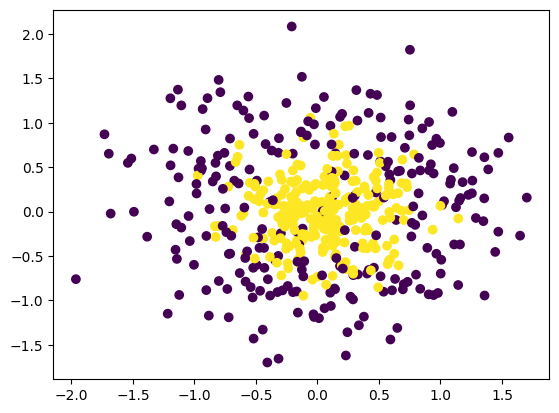

In [14]:
plt.scatter(x[:,0],x[:,1],c=y)

In [15]:
from sklearn.tree import DecisionTreeClassifier

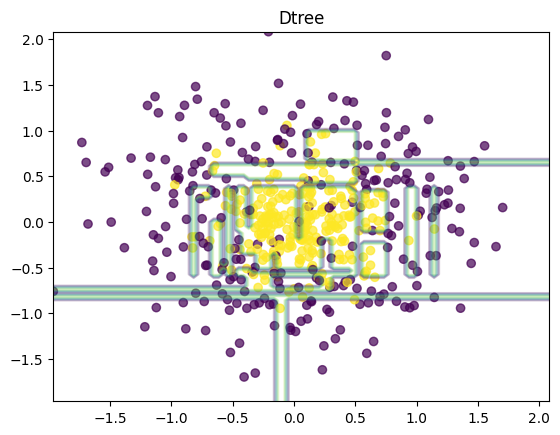

In [34]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train,y_train)

plt.Figure(figsize=(12,8))

x_range = np.linspace(x.min(),x.max(),100)
xx1,xx2 = np.meshgrid(x_range,x_range)

y_hat = dtree.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)

plt.contour(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(x[:,0],x[:,1],c=y,cmap="viridis",alpha=0.7)
plt.title("Dtree")
plt.show()


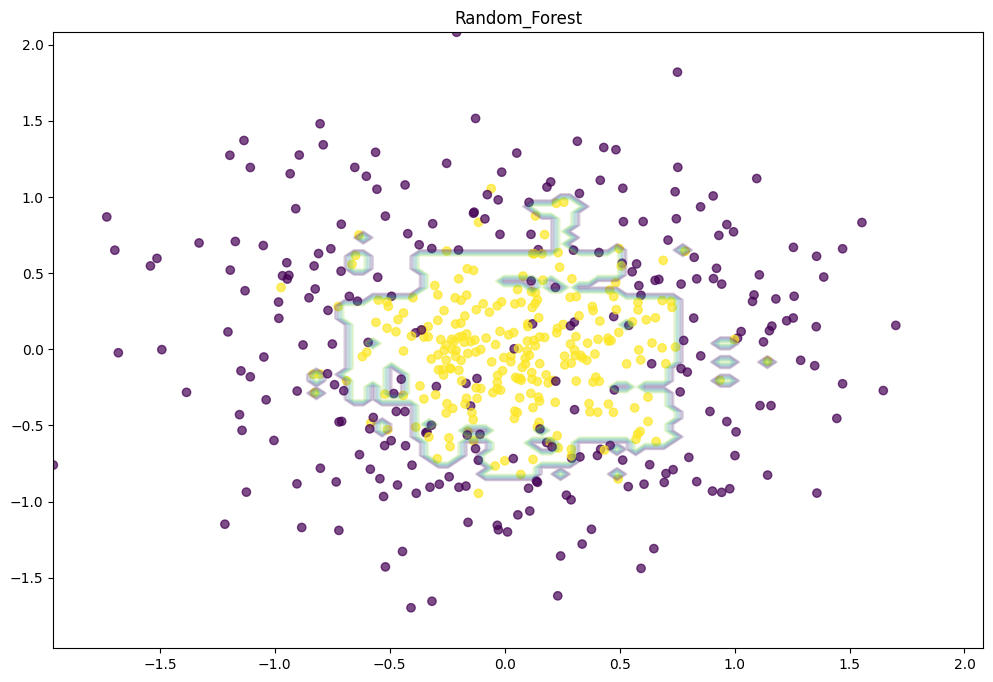

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=42)

rf.fit(x_train,y_train)

plt.figure(figsize=(12,8))

x_range = np.linspace(x.min(),x.max(),100)
xx1,xx2 = np.meshgrid(x_range,x_range)

y_hat = rf.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)

plt.contour(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(x[:,0],x[:,1],cmap="viridis",c=y,alpha=0.7)
plt.title("Random_Forest")
plt.show()

In [40]:
n_train = 150
n_test = 1000
noise = 0.1

# generate data

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x-2)**2)

def genrate(n_samples,noise):
    x = np.random.rand(n_samples) * 10 - 5
    x= np.sort(x).ravel()
    y = np.exp(-x**2) + 1.5 * np.exp(-(x - 2)**2) + np.random.normal(0.0,noise,n_samples)
    x = x.reshape(n_samples,1)
    return x,y

x_train,y_train = genrate(n_samples=n_train,noise=noise)
x_test,y_test = genrate(n_samples=n_test,noise=noise)

(-5.0, 5.0)

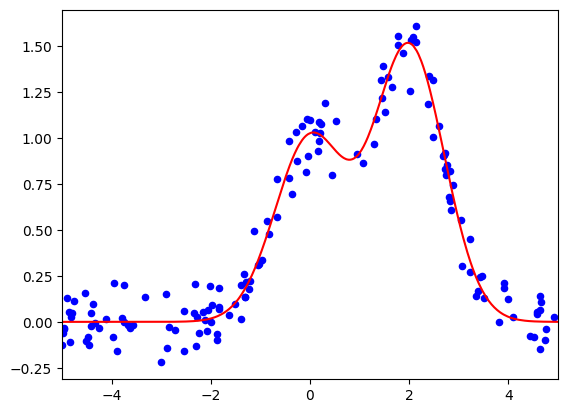

In [41]:
plt.Figure(figsize=(12,8))
plt.plot(x_test,f(x_test),"r")
plt.scatter(x_train,y_train,c="b",s=20)
plt.xlim([-5,5])

(-5.0, 5.0)

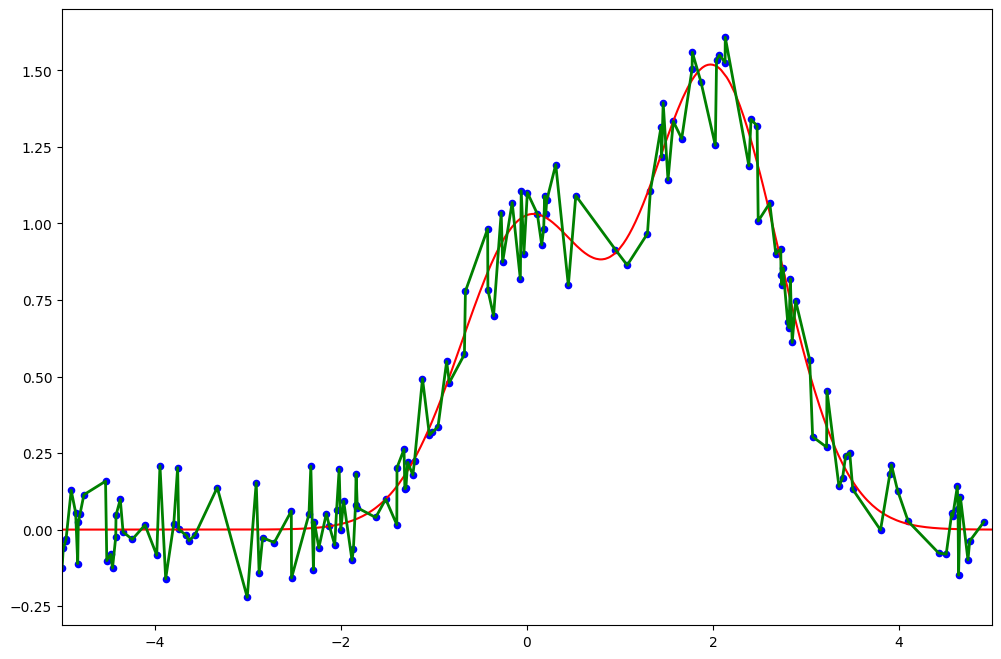

In [50]:
# one decision tress regressor

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(x_train,y_train)
d_predict = dtr.predict(x_train)

plt.figure(figsize=(12,8))
plt.plot(x_test,f(x_test),"r")
plt.scatter(x_train,y_train,c="b",s=20)
plt.plot(x_train,d_predict,c="g",lw=2)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Random forest')

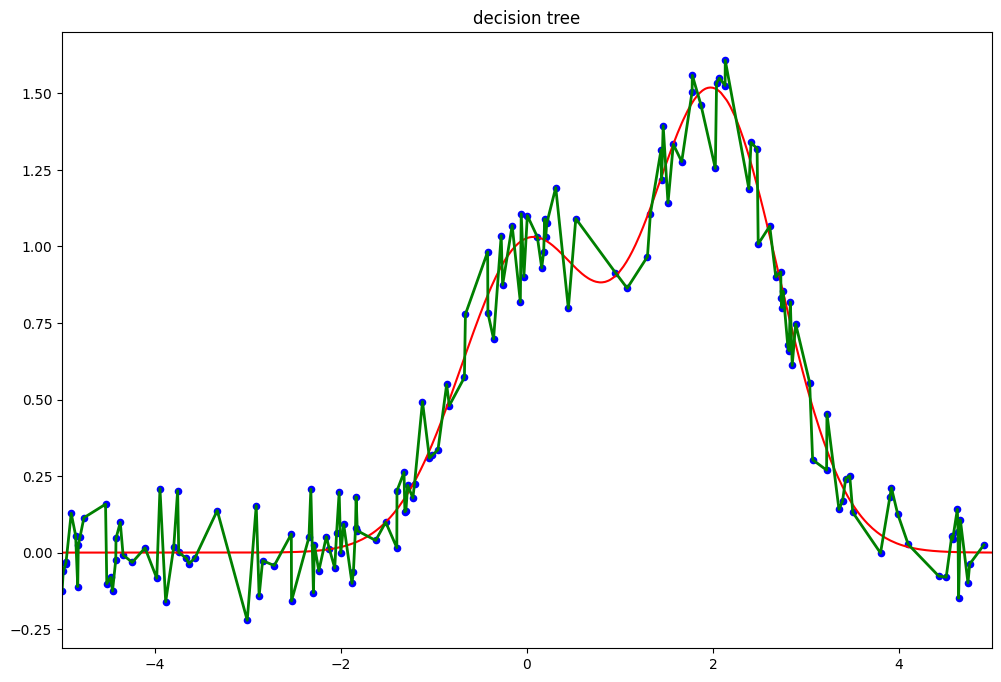

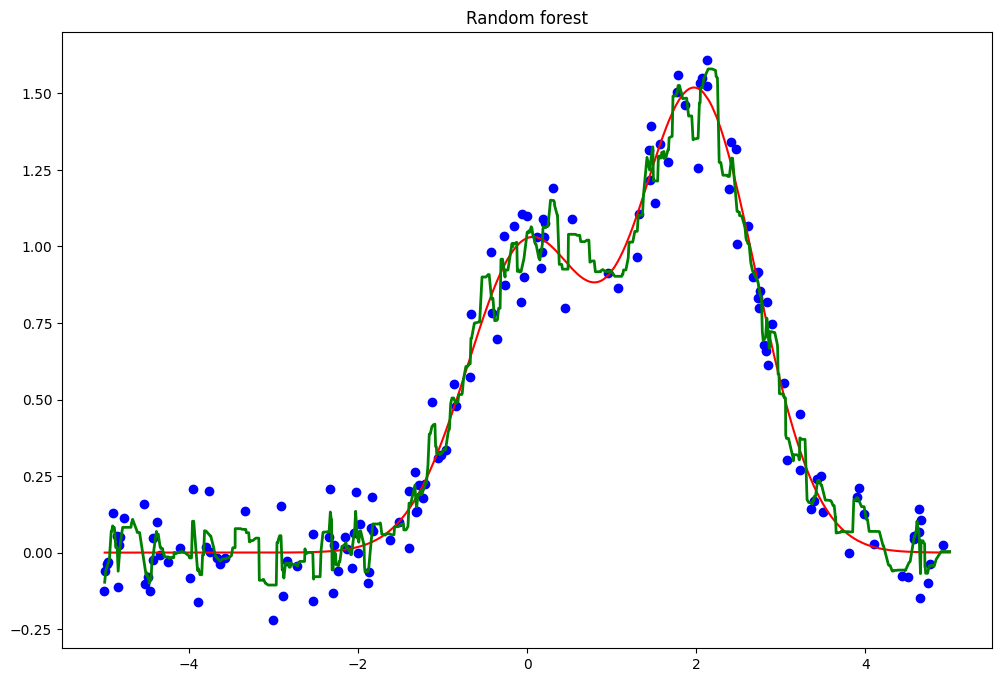

In [56]:
# one decision tress regressor

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(x_train,y_train)
d_predict = dtr.predict(x_train)

plt.figure(figsize=(12,8))
plt.plot(x_test,f(x_test),"r")
plt.scatter(x_train,y_train,c="b",s=20)
plt.plot(x_train,d_predict,c="g",lw=2)
plt.xlim([-5, 5])
plt.title("decision tree")
# ranodm forest

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500,random_state=42)
rfr.fit(x_train,y_train)

rfr_predict = rfr.predict(x_test)

plt.figure(figsize=(12,8))
plt.plot(x_test,f(x_test),"r")
plt.scatter(x_train,y_train,c="b")
plt.plot(x_test,rfr_predict,c="g",lw=2)
plt.title("Random forest")





# Decision treee is trying to overfit the model but as you can see random forest is not

